# Power 

In [1]:
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
from mpl_toolkits.basemap import Basemap


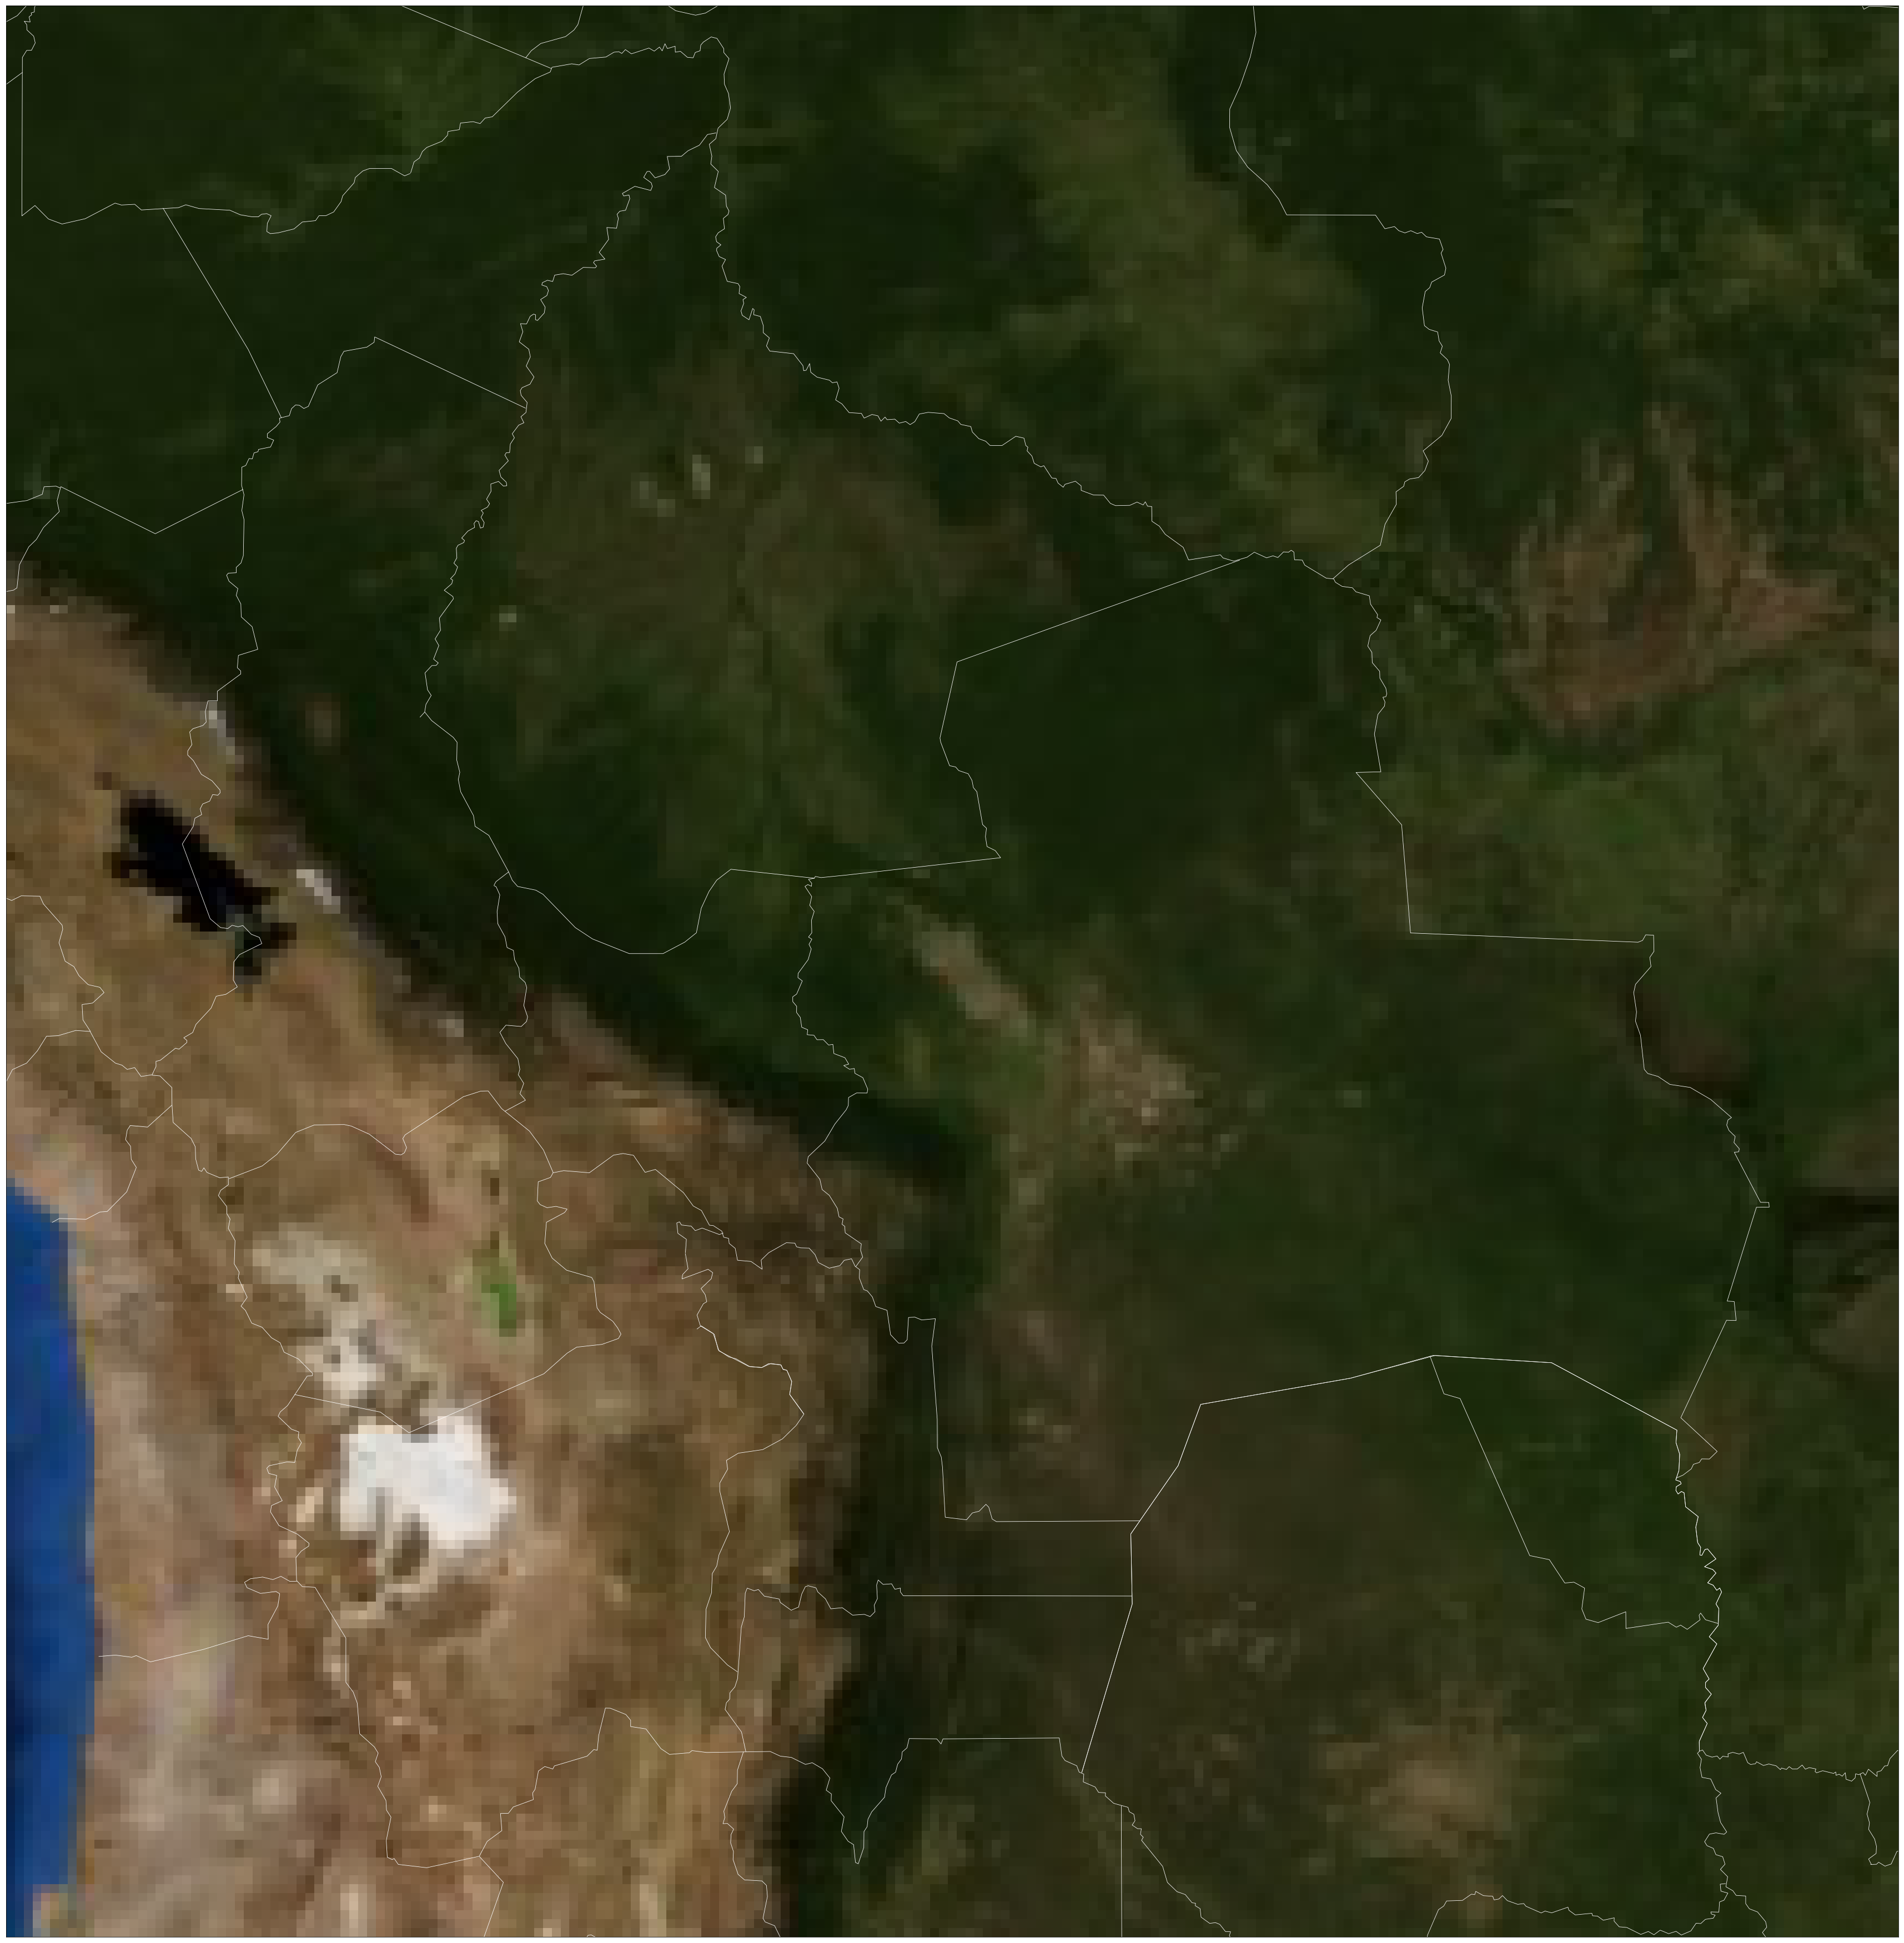

In [3]:
# Sample it down to only the Bolivian region
lon_min, lon_max = -70.752, -23.483-33
lat_min, lat_max = -56.382+33, -9.449

plt.figure(4, figsize=(64,64))

m = Basemap(projection='merc',
            resolution='i',
            llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,)
m.drawcountries(linewidth=0.8, color="w")              # thin white line for country borders
m.drawstates(linewidth=0.8, color="w")

m.bluemarble()
plt.show()

In [4]:
path_gps = '../data/nodes_clean.csv'
df_nodes = pd.read_csv(path_gps)
df_nodes.head()

,id,lat,lon,timestamp,uid
0,206996054,-12.883298,-67.012849,2008-01-06T11:40:59Z,7180
1,206996056,-12.884207,-67.009984,2008-01-06T11:40:59Z,7180
2,206996075,-12.879662,-66.994694,2008-01-06T11:41:00Z,7180
3,206996079,-12.877155,-66.994831,2008-01-06T11:41:00Z,7180
4,206996081,-12.873904,-66.995134,2008-01-06T11:41:00Z,7180


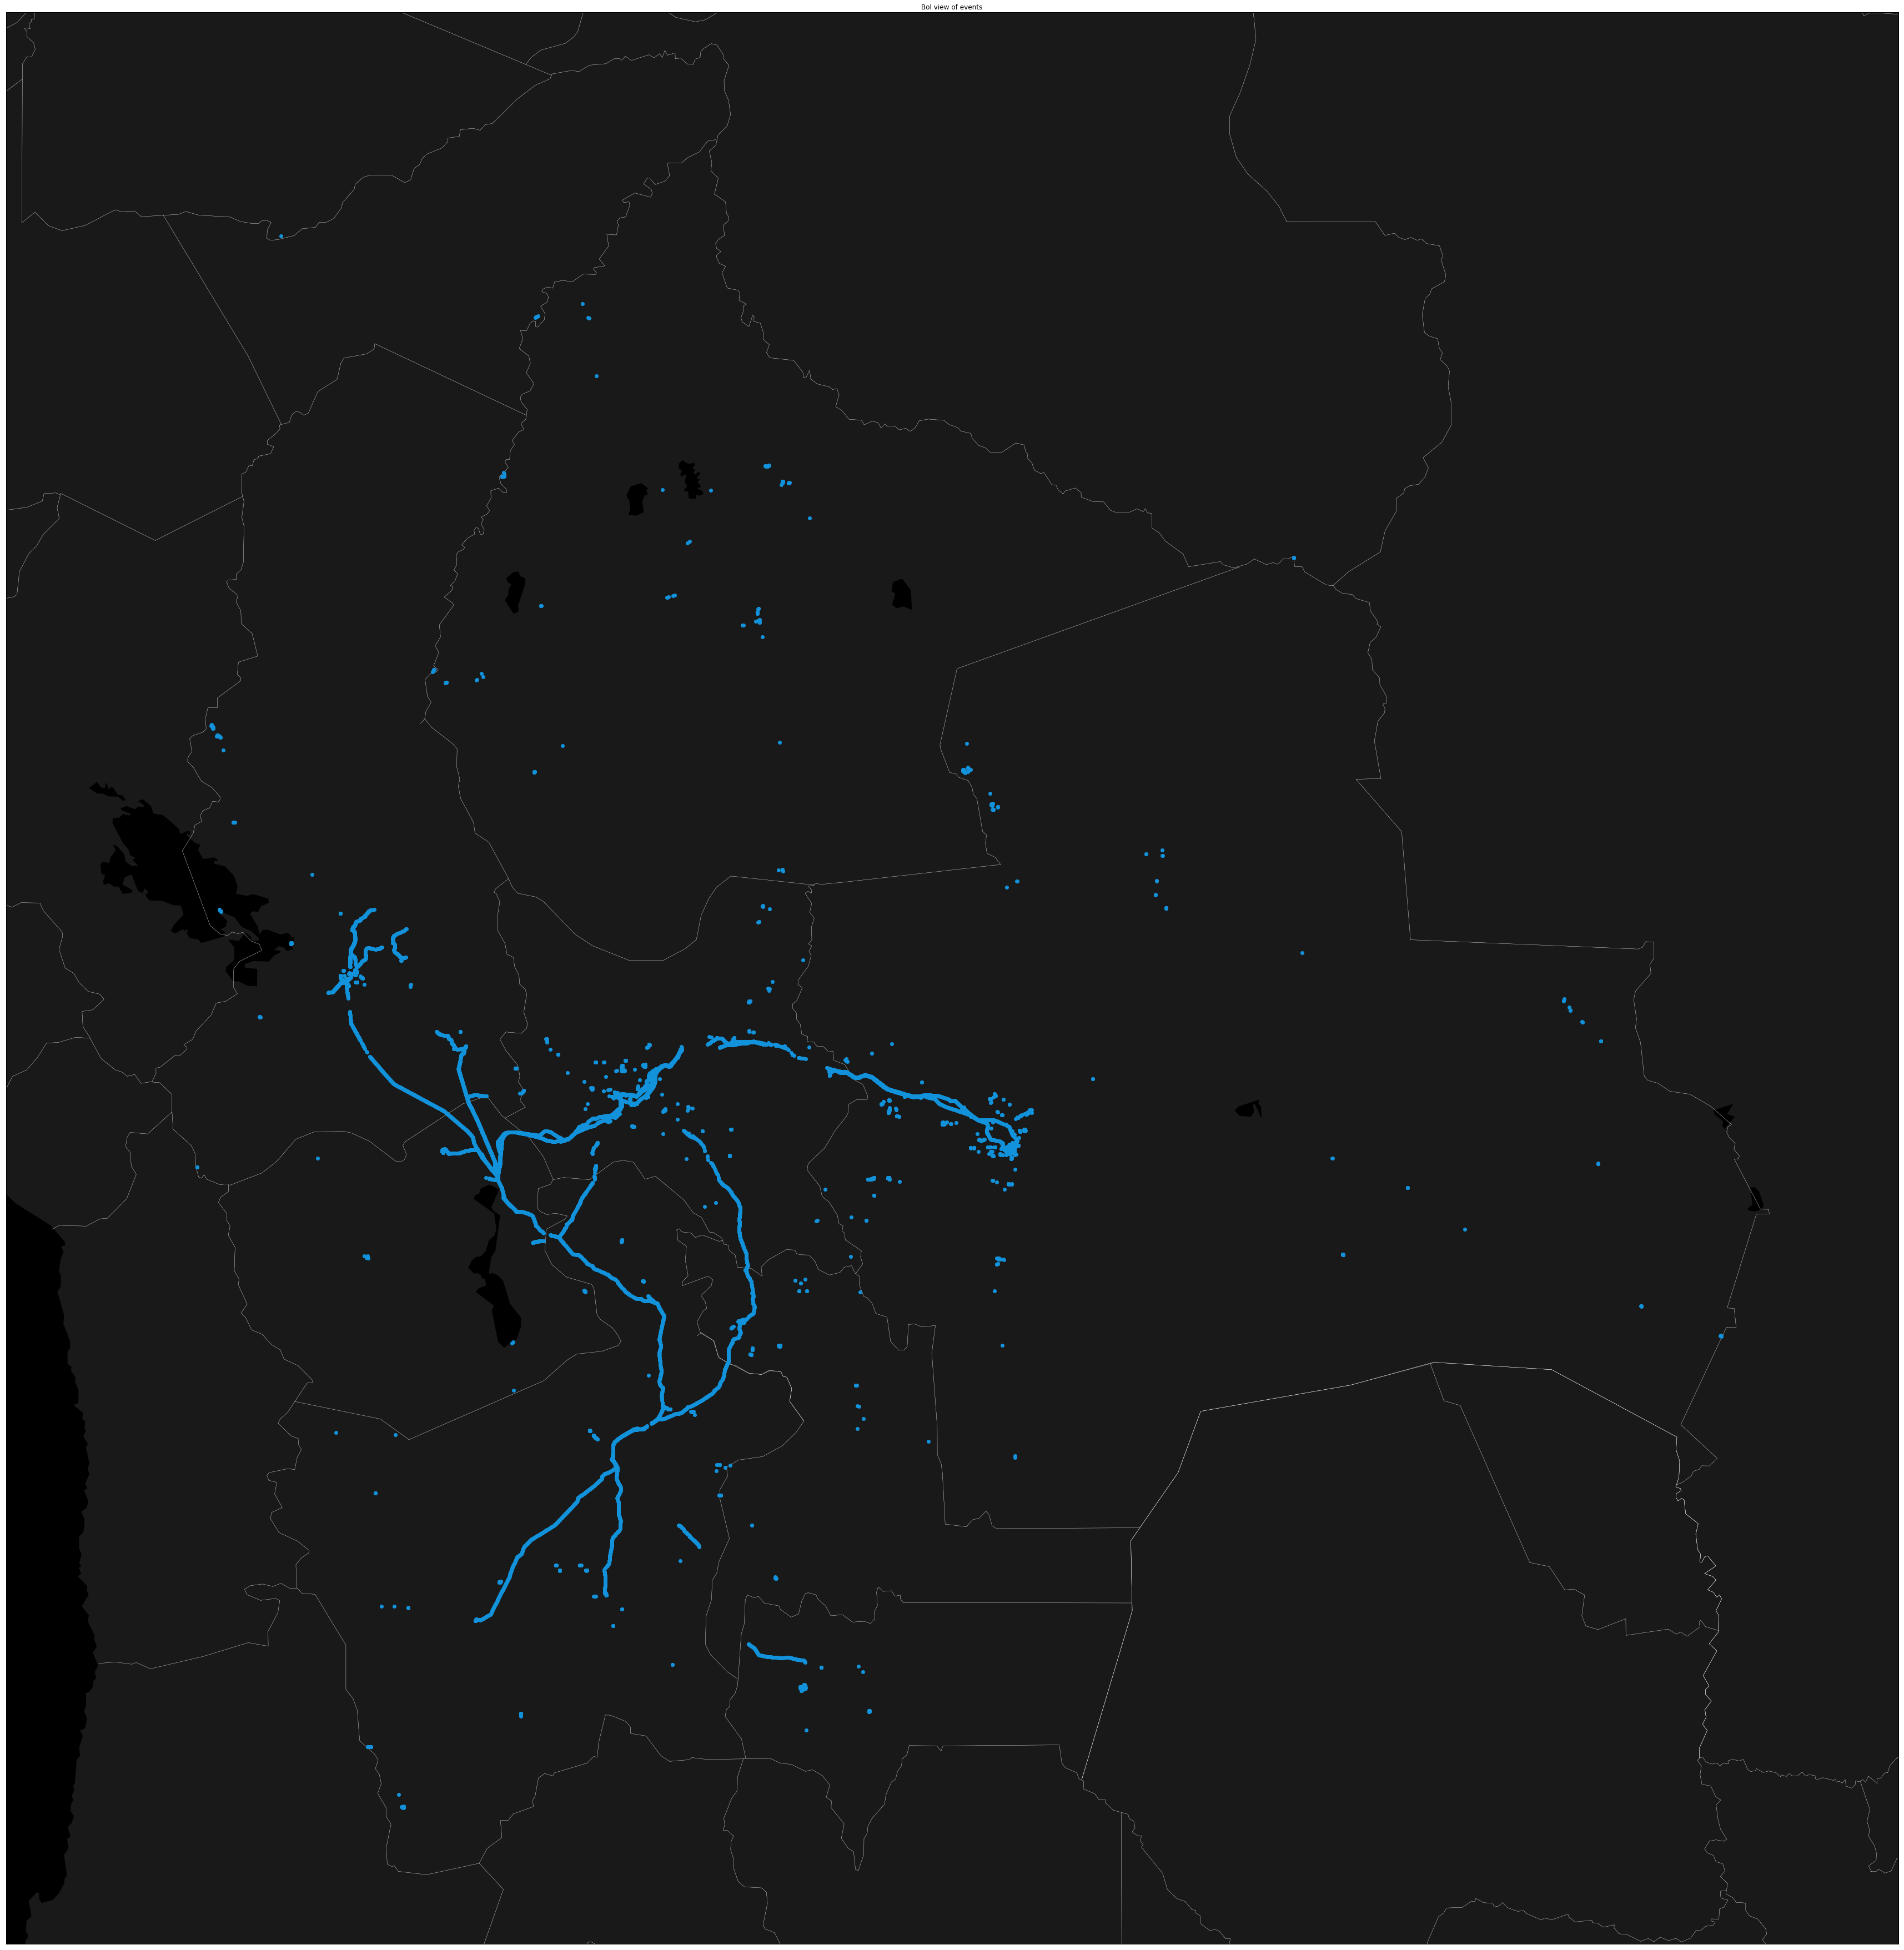

In [5]:

# Plot of the df_0 points over the whole Bolivian Region

idx_bol = (df_nodes["lon"]>lon_min) &\
            (df_nodes["lon"]<lon_max) &\
            (df_nodes["lat"]>lat_min) &\
            (df_nodes["lat"]<lat_max)

df_nodes = df_nodes[idx_bol]

# Mercator of China
plt.figure(4, figsize=(64,64))

m = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m.drawmapboundary(fill_color='#000000')                # black background
m.drawcountries(linewidth=0.4, color="w")              # thin white line for country borders
m.drawstates(linewidth=0.4, color="w")

# Plot the data
mxy = m(df_nodes["lon"].tolist(), df_nodes["lat"].tolist())
m.scatter(mxy[0], mxy[1], s=50, c="#1292db", lw=0, alpha=1, zorder=8)

plt.title("Bol view of events")
plt.show()

In [2]:
import geopandas
from shapely.geometry import Point


df_nodes['Coordinates'] = list(zip(df_nodes.lon, df_nodes.lat))
df_nodes['Coordinates'] = df_nodes['Coordinates'].apply(Point)

gdf = geopandas.GeoDataFrame(df_nodes, geometry='Coordinates')


ImportError: libpoppler.so.71: cannot open shared object file: No such file or directory

In [ ]:
from shapely.ops import nearest_points

# unary union of the gpd2 geomtries 
pts = gpf.geometry.unary_union
def near(point, pts=pts3):
    # find the nearest point and return the corresponding Place value
    nearest = gpd.geometry == nearest_points(point, pts)[1]
    return gpf[nearest].Place.get_values()[0]

gpf['Nearest'] = gpf.apply(lambda row: near(row.geometry), axis=1)

# SIN ANALYSIS

In [5]:
!pip install pandapower


    100% |████████████████████████████████| 10.6MB 598kB/s ta 0:00:01
    100% |████████████████████████████████| 266kB 1.0MB/s ta 0:00:01
  Running setup.py bdist_wheel for pandapower ... done
  Stored in directory: /home/stanlee321/.cache/pip/wheels/37/3d/8b/00cc42d74f535b118e3345bc9f967eab653cdf18d0a8e4ca24
  Running setup.py bdist_wheel for pypower ... done
  Stored in directory: /home/stanlee321/.cache/pip/wheels/16/96/f8/4674b96d983b9f63ad29abc36358daed87dee38a6db86a92da
Successfully built pandapower pypower


In [8]:

import pandapower as pp
import pandas as pd

In [18]:
excel_path = '../data/DATOS_SIN_TOTAL.xls'
hv_lines = pd.read_excel(excel_path,sheetname=1, header = 6, skyprows = 5)
hv_lines.head()

,AREA,PROPIETARIO,EN EL STI,TRAMO,TIPO,CODIGO,Nº CIRCUITOS,Un (kV),L (km),Pn (MW),...,C1 (F),R0 (ohm),X0 (ohm),C0 (F),Zc (ohm),Sn (MVA),SOBRECARGA (MVA),R1 (%),X1 (%),Qvacio (MVAr)
0,NORTE,DELAPAZ,NO,LT1 Alto Achachicala - Achachicala en 69 kV,Conductor Darien (559.5),AAC-ACH069,1.0,69.0,1.58,75.0,...,1.421400e-08,0.422882,2.011686,9.707300e-09,380.783753,79.0,103.0,0.39575,1.35996,0.021260
1,NORTE,DELAPAZ,NO,LT1 Alto Achachicala - Achachicala en 115 kV,Conductor Darien (559.5),AAC-ACH115,1.0,115.0,1.56,125.4,...,1.508800e-08,0.584510,2.154230,8.610800e-09,362.242025,132.0,172.0,0.14060,0.47030,0.062687
2,NORTE,DELAPAZ,NO,LT1 Alto Achachicala - Huarina en 69 kV,Conductor eq (4/0 + 151 mcm),AAC-HUR069,1.0,69.0,61.08,36.1,...,5.245300e-07,40.357457,83.222131,3.527900e-07,405.807920,38.0,49.0,48.36860,56.99840,0.784540
3,NORTE,COBEE,NO,LT1 Alto Achachicala - Río Seco en 115 kV,Conductor Darien (559.5),AAC-RSE115,1.0,115.0,9.16,96.0,...,8.747230e-08,3.392609,12.491277,5.010690e-08,362.367796,101.0,117.0,0.81600,2.72850,0.363430
4,NORTE,COBEE,NO,LT1 Alto Achachicala - SE Tiquimani en 115 kV,Conductor Arvidal (544) T1,AAC-TIQ11501,1.0,115.0,31.66,119.0,...,2.963040e-07,11.650620,41.819904,1.840140e-07,368.393677,125.0,136.0,2.88398,9.55247,1.231070


In [19]:
hv_lines.columns

Index(['AREA', 'PROPIETARIO', 'EN EL STI', 'TRAMO', 'TIPO', 'CODIGO',
       'Nº CIRCUITOS', 'Un (kV)', 'L (km)', 'Pn (MW)', 'NODO 1',
       'INTERRUPTOR 1', 'NODO 2', 'INTERRUPTOR 2', 'In (A)', 'Sbase (MVA)',
       'R1 (ohm)', 'X1 (ohm)', 'C1 (F)', 'R0 (ohm)', 'X0 (ohm)', 'C0 (F)',
       'Zc (ohm)', 'Sn (MVA)', 'SOBRECARGA (MVA)', 'R1 (%)', 'X1 (%)',
       'Qvacio (MVAr)'],
      dtype='object')

In [35]:
### Nodes

In [54]:
hv_nodes = pd.read_excel(excel_path, sheetname=0, header = 7, skyprows = 0)
hv_nodes = hv_nodes.drop(hv_nodes.index[0])
hv_nodes.head()

,AREA,TIPO,DESCRIPCION,NOMINAL,CODIGO
1,NORTE,REAL,Nodo 01 de Alto Achachicala en 12 kV,12,AAC01201
2,NORTE,REAL,Nodo 01 de Alto Achachicala en 69 kV,69,AAC06901
3,NORTE,REAL,Nodo 01 de Alto Achachicala en 115 kV,115,AAC11501
4,NORTE,REAL,Nodo 01 de Avenida Arce TR1 en 6.9 kV,6.9,AAR00601
5,NORTE,REAL,Nodo 02 de Avenida Arce TR2 en 6.9 kV,6.9,AAR00602


In [55]:
hv_nodes.columns

Index(['AREA', 'TIPO', 'DESCRIPCION', 'NOMINAL', 'CODIGO'], dtype='object')

In [ ]:
### Create buses

In [59]:
net = pp.create_empty_network()

for index, row in hv_nodes.iterrows():
    pp.create_bus(net, name=row["CODIGO"], vn_kv=row["NOMINAL"], type='n', zone=row["AREA"])

    net.bus

,name,vn_kv,type,zone,in_service
0,AAC01201,12.0,n,NORTE,True
1,AAC06901,69.0,n,NORTE,True
2,AAC11501,115.0,n,NORTE,True
3,AAR00601,6.9,n,NORTE,True
4,AAR00602,6.9,n,NORTE,True
5,AAR06901,69.0,n,NORTE,True
6,ACH00601,6.9,n,NORTE,True
7,ACH06901,69.0,n,NORTE,True
8,ACH11501,115.0,n,NORTE,True
9,ACI00601,6.6,n,NORTE,True


In [65]:
# create lines
for _, hv_line in hv_lines.iterrows():
    try:
        from_bus = pp.get_element_index(net, "bus", hv_line['NODO 1'])
        to_bus = pp.get_element_index(net, "bus", hv_line['NODO 2'])
        pp.create_line(net, from_bus, to_bus, length_km=hv_line["L (km)"],
                   std_type="184-AL1/30-ST1A 110.0", 
                   name= hv_line["TRAMO"], 
                   parallel=hv_line["Nº CIRCUITOS"])
    except Exception as e:
        print(e)
# show line table
net.line


There is no bus with name PLM069
There is no bus with name nan
There is no bus with name nan
There is no bus with name nan


,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,LT1 Alto Achachicala - Achachicala en 69 kV,184-AL1/30-ST1A 110.0,1,7,1.580,0.1571,0.4,8.8,0.0,0.535,1.0,1,ol,True
1,LT1 Alto Achachicala - Achachicala en 115 kV,184-AL1/30-ST1A 110.0,2,8,1.560,0.1571,0.4,8.8,0.0,0.535,1.0,1,ol,True
2,LT1 Alto Achachicala - Huarina en 69 kV,184-AL1/30-ST1A 110.0,1,189,61.080,0.1571,0.4,8.8,0.0,0.535,1.0,1,ol,True
3,LT1 Alto Achachicala - Río Seco en 115 kV,184-AL1/30-ST1A 110.0,2,324,9.160,0.1571,0.4,8.8,0.0,0.535,1.0,1,ol,True
4,LT1 Alto Achachicala - SE Tiquimani en 115 kV,184-AL1/30-ST1A 110.0,2,397,31.660,0.1571,0.4,8.8,0.0,0.535,1.0,1,ol,True
5,LT2 Alto Achachicala - SE Tiquimani en 115 kV,184-AL1/30-ST1A 110.0,2,397,31.560,0.1571,0.4,8.8,0.0,0.535,1.0,2,ol,True
6,LT1 Alto Achachicala - Tap Munaypata en 69 kV,184-AL1/30-ST1A 110.0,1,400,6.500,0.1571,0.4,8.8,0.0,0.535,1.0,1,ol,True
7,LT1 Alto Achachicala - Zongo en 115 kV,184-AL1/30-ST1A 110.0,2,481,20.000,0.1571,0.4,8.8,0.0,0.535,1.0,1,ol,True
8,LT1 Avenida Arce -Tap Killi Killi en 69 kV,184-AL1/30-ST1A 110.0,5,399,1.640,0.1571,0.4,8.8,0.0,0.535,1.0,1,ol,True
9,LT1 Achachicala - Challapampa en 115 kV,184-AL1/30-ST1A 110.0,8,80,3.430,0.1571,0.4,8.8,0.0,0.535,1.0,1,ol,True
